<a href="https://colab.research.google.com/github/ShruthiVidya-git/Prediction-of-Biological-Age-and-Mortality/blob/main/EDA_CS760.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import time
import seaborn as sns
plt.style.use('ggplot')

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install -U scikit-learn
from sklearn.neural_network import BernoulliRBM
import sklearn

sklearn.__version__


'1.0.2'

In [ ]:
data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/760 Project/OppScrData_.xlsx')

data = data.iloc[:,0:52]

data = data.dropna(axis=1,how='all')
print('\nDropping the 2 columns...\nDimensions of the data is ',data.shape)
data.head()


Dropping the 2 columns...
Dimensions of the data is  (9223, 50)


,Record ID,Visit ID,PT ID,Clinical F/U interval [d from CT],BMI,BMI >30,Sex,Age at CT,Tobacco,Alcohol abuse,...,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),VAT/SAT Ratio,Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median)
0,8675,415,6669,907,37.7,Y,Male,73,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.242557,170.053192,58.717526,5473.561,35.0
1,2236,525,2915,359,30.1,Y,Female,55,NaN,NaN,...,485.502857,694.314286,183.497143,302.008571,0.607589,16.150123,123.968745,48.413187,2709.064,52.0
2,5962,542,5321,412,28.1,N,Female,52,NaN,NaN,...,490.054545,706.051515,159.706061,330.348485,0.483447,23.337964,136.566261,50.101332,0.000,54.0
3,665,546,1934,2333,25.0,N,Male,60,Yes,NaN,...,289.108108,584.489189,144.002703,145.102703,0.992419,30.804567,212.296726,69.115854,2586.575,57.0
4,478,580,1817,532,22.4,N,Male,88,Yes,NaN,...,315.530769,588.892308,202.317949,113.212821,1.787059,-3.181874,168.923950,47.814581,431.519,53.0


## EDA

## CT DATA

In [ ]:
ct_data = data.iloc[:,-11:]

death = data['DEATH [d from CT]']
age = data['Age at CT']
sex = data['Sex']


ct_death = pd.concat([ct_data,death],axis=1)
ct_age = pd.concat([ct_data,age],axis=1)


In [ ]:
print(round(pd.isnull(ct_data).sum()/9223*100,2))

L1_HU_BMD                                   0.51
TAT Area (cm2)                              1.43
Total Body                Area EA (cm2)     1.43
VAT Area (cm2)                              1.43
SAT Area (cm2)                              1.43
VAT/SAT     Ratio                           1.44
Muscle HU                                   0.30
 Muscle Area (cm2)                          0.30
L3 SMI (cm2/m2)                             1.65
AoCa        Agatston                        0.01
Liver HU    (Median)                       47.26
dtype: float64


In [ ]:

# Remove all the rows with missing values
row_ids = []
CT_data = ct_data.dropna(axis=0,thresh=11) 
row_ids = ct_data.index.difference(ct_data.dropna().index).tolist()
CT_Death = ct_death.drop(row_ids)
CT_Age = ct_age.drop(row_ids)

Death = death.drop(row_ids)
Age = age.drop(row_ids)
Sex = sex.drop(row_ids)

print(CT_data.shape)
print(CT_Age.shape)
print(CT_Death.shape)
print(Death.shape)
print(np.shape(Age))
print(Sex.shape)


(4708, 11)
(4708, 12)
(4708, 12)
(4708,)
(4708,)
(4708,)


In [ ]:
CT_data.dtypes

L1_HU_BMD                                  float64
TAT Area (cm2)                             float64
Total Body                Area EA (cm2)    float64
VAT Area (cm2)                             float64
SAT Area (cm2)                             float64
VAT/SAT     Ratio                          float64
Muscle HU                                  float64
 Muscle Area (cm2)                         float64
L3 SMI (cm2/m2)                            float64
AoCa        Agatston                       float64
Liver HU    (Median)                       float64
dtype: object

Since Liver HU isn't highly correlated with both Age and Death features, ignoring the column

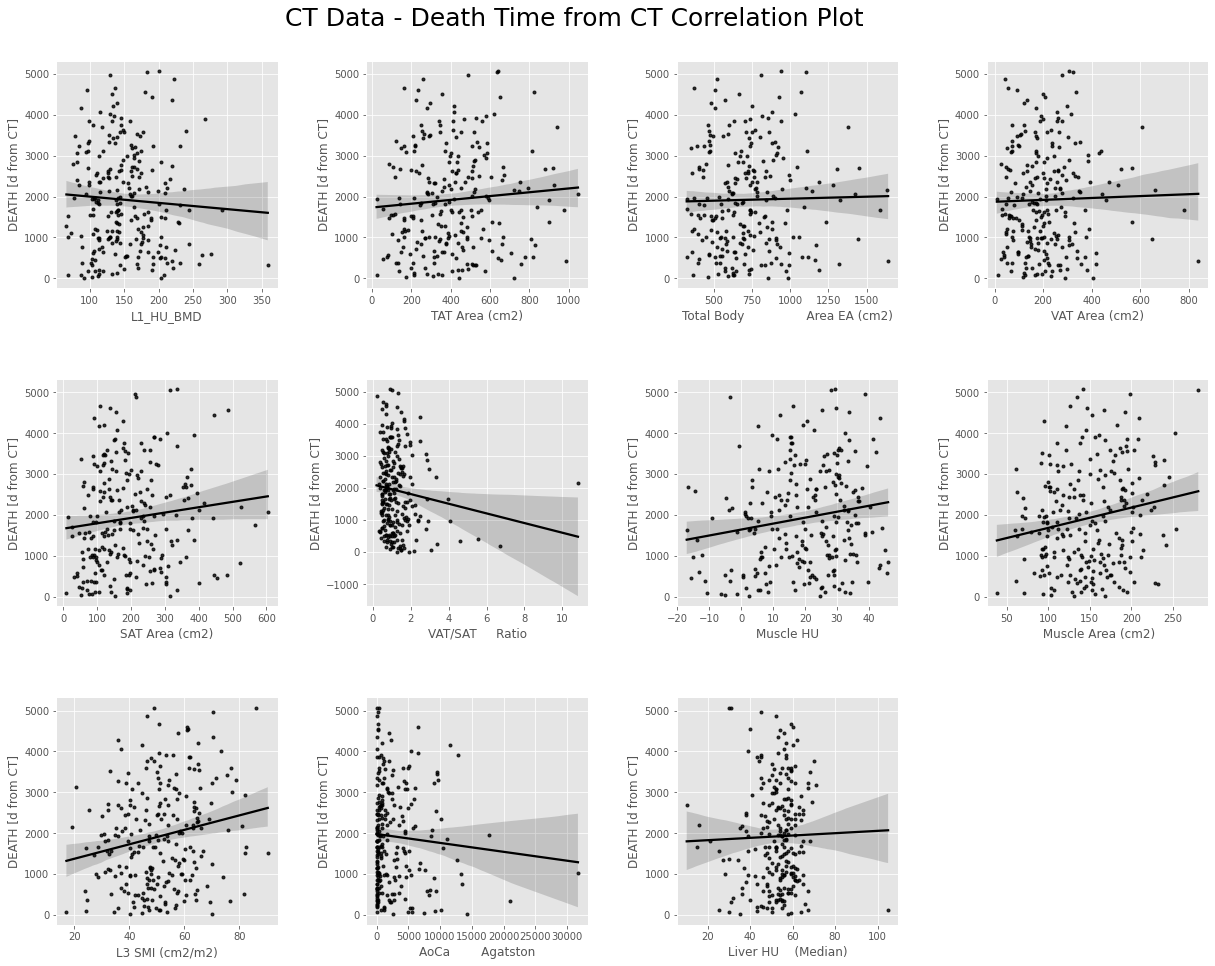

In [ ]:
# Plot correlation plot for Death and all the CT variables
plt.figure(figsize=(40,15))
plt.rcParams.update({'font.size': 10})
plots = []
col_names = CT_data.columns

k=0
for i in range(3):
    for j in range(4):
        ax = plt.subplot2grid((3,4), (i,j))
        sns.regplot(x=CT_data[col_names[k]], y=Death, marker = '.',color='k')
        plt.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.9, wspace=0.4, hspace=0.4)
        k+=1
        if k==11:
          break;

plt.suptitle('CT Data - Death Time from CT Correlation Plot\n\n', y=0.95,x=0.28,fontsize=25)
plt.show()


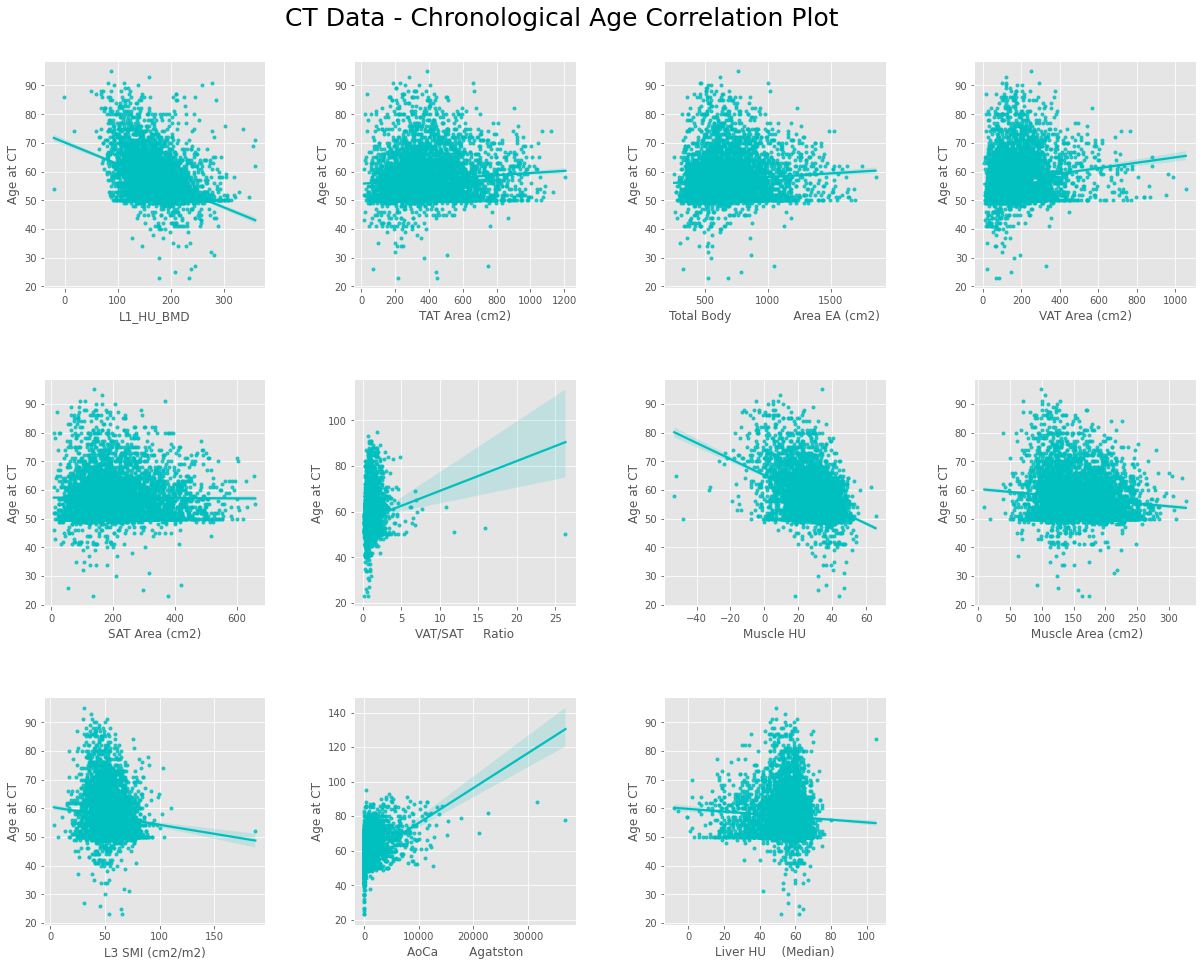

In [ ]:
# Plot correlation plot for Chronological Age and all the CT variables

plt.figure(figsize=(40,15))
plt.rcParams.update({'font.size': 10})
plots = []
col_names = CT_data.columns

k=0
for i in range(3):
    for j in range(4):
        ax = plt.subplot2grid((3,4), (i,j))
        sns.regplot(x=CT_data[col_names[k]], y=Age, marker = '.',color='c')
        plt.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.9, wspace=0.4, hspace=0.4)
        k+=1
        if k==11:
          break;

plt.suptitle('CT Data - Chronological Age Correlation Plot\n\n', y=0.95,x=0.28,fontsize=25)
plt.show()


In [ ]:
# find the most important feature
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler1.fit(CT_data)
CT_data_scaled = scaler1.transform(CT_data)  

scaler = StandardScaler()
scaler.fit(np.reshape(np.array(Age),(-1,1)))
Age_scaled = np.reshape(scaler.transform(np.reshape(np.array(Age),(-1,1))),(-1))

scaler = StandardScaler()
scaler.fit(np.reshape(np.array(Death),(-1,1)))
Death_scaled = np.reshape(scaler.transform(np.reshape(np.array(Death),(-1,1))),(-1))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
CT_data_scaled_pca = pca.fit_transform(CT_data_scaled)
print(abs( pca.components_ )) # 

[[0.05263036 0.43776432 0.44606282 0.42002374 0.3123983  0.18532061
  0.17329455 0.31035053 0.31380836 0.08841945 0.25616771]
 [0.28581353 0.15818491 0.04851548 0.03960298 0.3241445  0.25452413
  0.5627791  0.45491797 0.40274646 0.1784263  0.04245567]
 [0.41911791 0.13580683 0.03420585 0.18299004 0.43895794 0.57249964
  0.09272557 0.03232239 0.11776395 0.47644235 0.01711546]]
